In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

<h1>Загрузка и первичный анализ данных</h1>
<p>Используем этот датасет <a href=https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml>airbnb-listings</a></p>

In [2]:
data = pd.read_csv('train.csv', sep=",")

In [3]:
data.shape

(74111, 29)

In [4]:
data.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [5]:
data.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [6]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 74111


<h1>1.Обработка пропусков в данных</h1>

<h3>1.1.Простые стратегии - удаление или заполнение нулями</h3>

In [8]:
#удал. столбцы с пустыми знач.
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((74111, 29), (74111, 16))

In [9]:
#удал. строки с пустыми знач.
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((74111, 29), (38502, 29))

In [10]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [11]:
#заполняем нулями пустые
data_new_3 = data.fillna(0)
data_new_3.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,0.0,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,0,20009,0.0,1.0


<h1>1.2."Внедрение значений" - импьютация (imputation)</h1>

<h3>1.2.1.Обработка пропусков в числовых данных</h3>

In [12]:
num_cols = []
for col in data.columns:     
    temp_null_count = data[data[col].isnull()].shape[0] # Количество пустых значений
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка bathrooms. Тип данных float64. Количество пустых значений 200, 0.27%.
Колонка review_scores_rating. Тип данных float64. Количество пустых значений 16722, 22.56%.
Колонка bedrooms. Тип данных float64. Количество пустых значений 91, 0.12%.
Колонка beds. Тип данных float64. Количество пустых значений 131, 0.18%.


In [13]:
#фильтр по колонкам
data_num = data[num_cols]
data_num

,bathrooms,review_scores_rating,bedrooms,beds
0,1.0,100.0,1.0,1.0
1,1.0,93.0,3.0,3.0
2,1.0,92.0,1.0,3.0
3,1.0,NaN,2.0,2.0
4,1.0,40.0,0.0,1.0
5,1.0,100.0,1.0,1.0
6,1.0,97.0,1.0,1.0
7,1.0,93.0,1.0,1.0
8,1.0,99.0,1.0,1.0
9,1.0,90.0,1.0,1.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


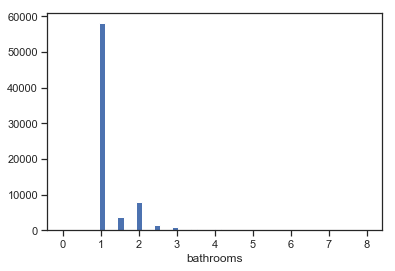

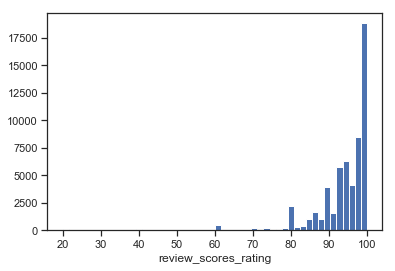

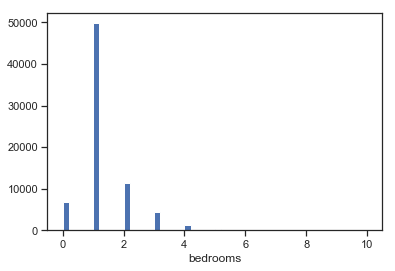

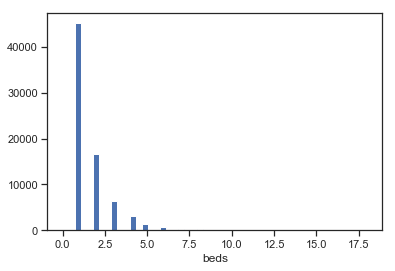

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
#Фильтр по пустым значениям поля review_scores_rating 
data[data['review_scores_rating'].isnull()]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
12,14066228,4.248495,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",2,1.0,Real Bed,flexible,True,...,33.813228,-118.389434,Beach Pad 1 min walk to the ocean!,Torrance,0,NaN,https://a0.muscache.com/im/pictures/be827784-a...,90277,1.0,1.0
15,6226658,4.094345,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.5,Real Bed,moderate,True,...,41.908240,-87.695242,Sweet Home Chicago,Humboldt Park,0,NaN,https://a0.muscache.com/im/pictures/996e04cd-5...,60622,1.0,1.0
24,2479317,6.956545,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",4,1.0,Real Bed,moderate,True,...,38.911275,-77.037272,Dupont 1 bedroom - 1 mile from the White House!,Dupont Circle,0,NaN,https://a0.muscache.com/im/pictures/a24c135a-0...,20009,1.0,2.0
31,5520582,3.828641,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,...,34.064077,-118.345910,Cosy private room/bathroom in Miracle Mile.,Mid-Wilshire,0,NaN,https://a0.muscache.com/im/pictures/14bf8357-c...,90036,1.0,1.0
34,5559765,4.356709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,flexible,True,...,34.086309,-118.271227,Hollywood SpAcIoUs 1 BeDrOoM w/Pool,NaN,1,NaN,https://a0.muscache.com/im/pictures/3802cb32-3...,90026,1.0,2.0
40,19813606,5.521461,Condominium,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",5,2.0,Real Bed,strict,True,...,41.861057,-87.619303,Modern condo close to parks and museums,South Loop/Printers Row,0,NaN,https://a0.muscache.com/im/pictures/f61997c8-7...,60605,2.0,2.0
41,18191678,4.787492,Apartment,Shared room,"{TV,""Air conditioning"",""Wheelchair accessible""...",4,1.0,Real Bed,moderate,True,...,34.107803,-118.320068,Luxury Apt Complex,NaN,0,NaN,https://a0.muscache.com/im/pictures/da9f8b4b-e...,90068,1.0,1.0
45,15238989,5.521461,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,...,40.768933,-73.953772,Beautiful 1bd at the heart of the UES,Upper East Side,0,NaN,https://a0.muscache.com/im/pictures/5de7807d-b...,10021,1.0,1.0
46,18004987,5.010635,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,...,38.901936,-77.052309,1 bedroom apartment in DC,NaN,1,NaN,NaN,20037,1.0,1.0


In [16]:
flt_index = data[data['review_scores_rating'].isnull()].index
flt_index

Int64Index([    3,    12,    15,    24,    31,    34,    40,    41,    45,
               46,
            ...
            74061, 74069, 74071, 74080, 74081, 74083, 74089, 74095, 74106,
            74109],
           dtype='int64', length=16722)

In [17]:
data[data.index.isin(flt_index)]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
12,14066228,4.248495,Apartment,Private room,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",2,1.0,Real Bed,flexible,True,...,33.813228,-118.389434,Beach Pad 1 min walk to the ocean!,Torrance,0,NaN,https://a0.muscache.com/im/pictures/be827784-a...,90277,1.0,1.0
15,6226658,4.094345,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.5,Real Bed,moderate,True,...,41.908240,-87.695242,Sweet Home Chicago,Humboldt Park,0,NaN,https://a0.muscache.com/im/pictures/996e04cd-5...,60622,1.0,1.0
24,2479317,6.956545,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",4,1.0,Real Bed,moderate,True,...,38.911275,-77.037272,Dupont 1 bedroom - 1 mile from the White House!,Dupont Circle,0,NaN,https://a0.muscache.com/im/pictures/a24c135a-0...,20009,1.0,2.0
31,5520582,3.828641,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",2,1.0,Real Bed,strict,True,...,34.064077,-118.345910,Cosy private room/bathroom in Miracle Mile.,Mid-Wilshire,0,NaN,https://a0.muscache.com/im/pictures/14bf8357-c...,90036,1.0,1.0
34,5559765,4.356709,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,flexible,True,...,34.086309,-118.271227,Hollywood SpAcIoUs 1 BeDrOoM w/Pool,NaN,1,NaN,https://a0.muscache.com/im/pictures/3802cb32-3...,90026,1.0,2.0
40,19813606,5.521461,Condominium,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",5,2.0,Real Bed,strict,True,...,41.861057,-87.619303,Modern condo close to parks and museums,South Loop/Printers Row,0,NaN,https://a0.muscache.com/im/pictures/f61997c8-7...,60605,2.0,2.0
41,18191678,4.787492,Apartment,Shared room,"{TV,""Air conditioning"",""Wheelchair accessible""...",4,1.0,Real Bed,moderate,True,...,34.107803,-118.320068,Luxury Apt Complex,NaN,0,NaN,https://a0.muscache.com/im/pictures/da9f8b4b-e...,90068,1.0,1.0
45,15238989,5.521461,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,...,40.768933,-73.953772,Beautiful 1bd at the heart of the UES,Upper East Side,0,NaN,https://a0.muscache.com/im/pictures/5de7807d-b...,10021,1.0,1.0
46,18004987,5.010635,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,...,38.901936,-77.052309,1 bedroom apartment in DC,NaN,1,NaN,NaN,20037,1.0,1.0


In [18]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['review_scores_rating']

3       NaN
12      NaN
15      NaN
24      NaN
31      NaN
34      NaN
40      NaN
41      NaN
45      NaN
46      NaN
47      NaN
48      NaN
51      NaN
53      NaN
61      NaN
62      NaN
63      NaN
64      NaN
66      NaN
71      NaN
72      NaN
74      NaN
78      NaN
79      NaN
86      NaN
92      NaN
93      NaN
94      NaN
95      NaN
106     NaN
         ..
73942   NaN
73945   NaN
73946   NaN
73947   NaN
73950   NaN
73959   NaN
73962   NaN
73989   NaN
74003   NaN
74011   NaN
74013   NaN
74014   NaN
74025   NaN
74027   NaN
74030   NaN
74043   NaN
74047   NaN
74050   NaN
74054   NaN
74058   NaN
74061   NaN
74069   NaN
74071   NaN
74080   NaN
74081   NaN
74083   NaN
74089   NaN
74095   NaN
74106   NaN
74109   NaN
Name: review_scores_rating, Length: 16722, dtype: float64

In [19]:
data_num_review_scores_rating = data_num[['review_scores_rating']]
data_num_review_scores_rating.head()

,review_scores_rating
0,100.0
1,93.0
2,92.0
3,NaN
4,40.0


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [21]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_review_scores_rating)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [22]:
strategies=['mean', 'median','most_frequent']

In [23]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_review_scores_rating)
    return data_num_imp[mask_missing_values_only]

In [24]:
strategies[0], test_num_impute(strategies[0])

('mean', array([94.06736483, 94.06736483, 94.06736483, ..., 94.06736483,
        94.06736483, 94.06736483]))

In [25]:
strategies[1], test_num_impute(strategies[1])

('median', array([96., 96., 96., ..., 96., 96., 96.]))

In [26]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([100., 100., 100., ..., 100., 100., 100.]))

In [27]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [28]:
data[['beds']].describe()

,beds
count,73980.000000
mean,1.710868
std,1.254142
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,18.000000


In [29]:
test_num_impute_col(data, 'beds', strategies[0])

('beds', 'mean', 131, 1.710867802108678, 1.710867802108678)

In [30]:
test_num_impute_col(data, 'beds', strategies[1])

('beds', 'median', 131, 1.0, 1.0)

In [31]:
test_num_impute_col(data, 'beds', strategies[2])

('beds', 'most_frequent', 131, 1.0, 1.0)

<h3>1.2.2.Обработка пропусков в категориальных данных</h3>

In [32]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка first_review. Тип данных object. Количество пустых значений 15864, 21.41%.
Колонка host_has_profile_pic. Тип данных object. Количество пустых значений 188, 0.25%.
Колонка host_identity_verified. Тип данных object. Количество пустых значений 188, 0.25%.
Колонка host_response_rate. Тип данных object. Количество пустых значений 18299, 24.69%.
Колонка host_since. Тип данных object. Количество пустых значений 188, 0.25%.
Колонка last_review. Тип данных object. Количество пустых значений 15827, 21.36%.
Колонка neighbourhood. Тип данных object. Количество пустых значений 6872, 9.27%.
Колонка thumbnail_url. Тип данных object. Количество пустых значений 8216, 11.09%.
Колонка zipcode. Тип данных object. Количество пустых значений 966, 1.3%.


In [33]:
cat_temp_data = data[['host_response_rate']]
cat_temp_data.head()

,host_response_rate
0,NaN
1,100%
2,100%
3,NaN
4,100%


In [34]:
cat_temp_data['host_response_rate'].unique()

array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '78%', '75%', '65%', '97%',
       '87%', '40%', '54%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '36%', '55%', '43%', '13%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

In [35]:
cat_temp_data[cat_temp_data['host_response_rate'].isnull()].shape

(18299, 1)

In [36]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['100%'],
       ['100%'],
       ['100%'],
       ...,
       ['100%'],
       ['100%'],
       ['100%']], dtype=object)

In [37]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['0%', '10%', '100%', '11%', '13%', '14%', '15%', '17%', '20%',
       '21%', '22%', '23%', '25%', '26%', '27%', '29%', '30%', '31%',
       '33%', '35%', '36%', '38%', '39%', '40%', '41%', '42%', '43%',
       '44%', '46%', '47%', '50%', '52%', '53%', '54%', '55%', '56%',
       '57%', '58%', '59%', '6%', '60%', '61%', '62%', '63%', '64%',
       '65%', '66%', '67%', '68%', '69%', '70%', '71%', '72%', '73%',
       '74%', '75%', '76%', '77%', '78%', '79%', '80%', '81%', '82%',
       '83%', '84%', '85%', '86%', '87%', '88%', '89%', '90%', '91%',
       '92%', '93%', '94%', '95%', '96%', '97%', '98%', '99%'],
      dtype=object)

In [38]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='55%')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['55%'],
       ['100%'],
       ['100%'],
       ...,
       ['100%'],
       ['100%'],
       ['100%']], dtype=object)

In [39]:
np.unique(data_imp3)

array(['0%', '10%', '100%', '11%', '13%', '14%', '15%', '17%', '20%',
       '21%', '22%', '23%', '25%', '26%', '27%', '29%', '30%', '31%',
       '33%', '35%', '36%', '38%', '39%', '40%', '41%', '42%', '43%',
       '44%', '46%', '47%', '50%', '52%', '53%', '54%', '55%', '56%',
       '57%', '58%', '59%', '6%', '60%', '61%', '62%', '63%', '64%',
       '65%', '66%', '67%', '68%', '69%', '70%', '71%', '72%', '73%',
       '74%', '75%', '76%', '77%', '78%', '79%', '80%', '81%', '82%',
       '83%', '84%', '85%', '86%', '87%', '88%', '89%', '90%', '91%',
       '92%', '93%', '94%', '95%', '96%', '97%', '98%', '99%'],
      dtype=object)

In [40]:
data_imp3[data_imp3=='55%'].size

18312

<h1>2.Преобразование категориальных признаков в числовые</h1>

In [41]:
cat_temp_data1 = data[['neighbourhood']]
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NotState')
data_imp3 = imp3.fit_transform(cat_temp_data1)
cat_enc = pd.DataFrame({'c1':data_imp3.T[0]})
cat_enc

,c1
0,Brooklyn Heights
1,Hell's Kitchen
2,Harlem
3,Lower Haight
4,Columbia Heights
5,Noe Valley
6,NotState
7,Downtown
8,Richmond District
9,NotState


<h1>2.1.Кодирование категорий целочисленными значениями - label encoding</h1>

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [43]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [44]:
cat_enc['c1'].unique()

array(['Brooklyn Heights', "Hell's Kitchen", 'Harlem', 'Lower Haight',
       'Columbia Heights', 'Noe Valley', 'NotState', 'Downtown',
       'Richmond District', 'Alphabet City', 'Hermosa Beach', 'Torrance',
       'U Street Corridor', 'Humboldt Park', 'Wicker Park',
       'South Boston', 'Lower East Side', 'Flatbush', 'Sherman Oaks',
       'East Flatbush', 'Valley Glen', 'Dupont Circle', 'Jamaica',
       'Forest Hills', 'Murray Hill', 'Lefferts Garden', 'Mid-Wilshire',
       'Venice', 'West Hollywood', 'Brownsville', 'Williamsburg',
       'East Village', 'South Loop/Printers Row', 'Westlake',
       'Hollywood Hills', 'Upper East Side', 'Bushwick',
       'Bedford-Stuyvesant', 'Pilsen', 'Chelsea', 'Sunnyside',
       'Greenwich Village', 'Washington Heights', 'Pasadena',
       'Potrero Hill', 'Brookland', 'Los Feliz', 'Hollywood',
       'Midtown East', 'Glendale', 'Park Slope', 'Arcadia',
       'West Village', 'Astoria', 'Portola', 'Burbank', 'East Harlem',
       'Silver La

In [45]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [46]:
le.inverse_transform([0, 1, 2, 3, 619])

array(['16th Street Heights', 'Adams Morgan', 'Alamo Square',
       'Albany Park', 'Wrigleyville'], dtype=object)

<h1>2.2.Кодирование категорий наборами бинарных значений - one-hot encoding</h1>

In [47]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [48]:
cat_enc.shape

(74111, 1)

In [49]:
cat_enc_ohe.shape

(74111, 620)

In [50]:
cat_enc_ohe

<74111x620 sparse matrix of type '<class 'numpy.float64'>'
	with 74111 stored elements in Compressed Sparse Row format>

In [51]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
cat_enc.head(10)

,c1
0,Brooklyn Heights
1,Hell's Kitchen
2,Harlem
3,Lower Haight
4,Columbia Heights
5,Noe Valley
6,NotState
7,Downtown
8,Richmond District
9,NotState


<h1>2.3.Pandas get_dummies - быстрый вариант one-hot кодирования</h1>

In [53]:
pd.get_dummies(cat_enc).head()

,c1_16th Street Heights,c1_Adams Morgan,c1_Alamo Square,c1_Albany Park,c1_Alhambra,c1_Allerton,c1_Allston-Brighton,c1_Alondra Park,c1_Alphabet City,c1_Altadena,...,c1_Winnetka,c1_Winthrop,c1_Woodhaven,c1_Woodland,c1_Woodland Hills/Warner Center,c1_Woodlawn,c1_Woodley Park,c1_Woodridge,c1_Woodside,c1_Wrigleyville
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,host_response_rate_0%,host_response_rate_10%,host_response_rate_100%,host_response_rate_11%,host_response_rate_13%,host_response_rate_14%,host_response_rate_15%,host_response_rate_17%,host_response_rate_20%,host_response_rate_21%,...,host_response_rate_91%,host_response_rate_92%,host_response_rate_93%,host_response_rate_94%,host_response_rate_95%,host_response_rate_96%,host_response_rate_97%,host_response_rate_98%,host_response_rate_99%,host_response_rate_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1>3.Масштабирование данных</h1>

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

<h2>3.1.MinMax масштабирование</h2>

In [56]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['accommodates']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


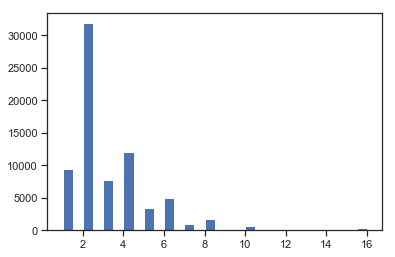

In [57]:
plt.hist(data['accommodates'], 30)
plt.show()

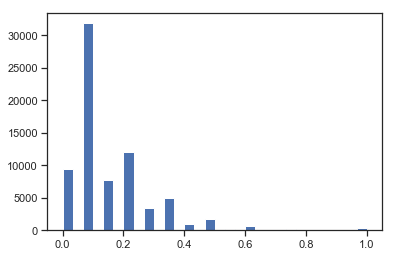

In [58]:
plt.hist(sc1_data, 30)
plt.show()

<h2>3.2.Масштабирование данных на основе Z-оценки - StandardScaler</h2>

In [59]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['accommodates']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


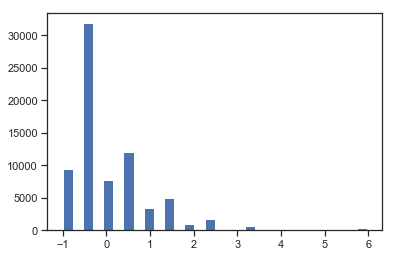

In [60]:
plt.hist(sc2_data, 30)
plt.show()

<h2>3.3.Нормализация данных</h2>

In [61]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['log_price']])

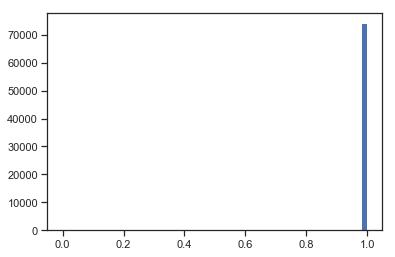

In [62]:
plt.hist(sc3_data, 50)
plt.show()